<a href="https://colab.research.google.com/github/Vinay-yele/1BM22AI152-AGA/blob/main/SCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$PROGRAM-1$ : $FUZZYRELATIONS$

In [ ]:
import numpy as np

R = {
    "Low Temp": [0.8, 0.5, 0.3],
    "Medium Temp": [0.6, 0.7, 0.4],
    "High Temp": [0.3, 0.6, 0.9]
}

# Fuzzy Relations for Humidity to Cooling (S(Y -> Z))
S = {
    "Dry": [0.7, 0.4, 0.3],        # Low Cooling, Medium Cooling, High Cooling
    "Normal": [0.5, 0.6, 0.4],
    "Humid": [0.2, 0.5, 0.8]
}

# Input values
temperature_input = "Low Temp"  # Low Temperature
humidity_input = "Dry"         # Dry Humidity

# Extract the relevant membership values for the given inputs
mu_R = R[temperature_input]  # Membership values for Low Temp
mu_S = S[humidity_input]     # Membership values for Dry Humidity

# Apply Min-Max Composition
def min_max_composition(mu_R, mu_S):
    # Initialize the result for the composed relation (Low Cooling, Medium Cooling, High Cooling)
    result = []

    # Perform Min-Max Composition for each cooling action (Low, Medium, High Cooling)
    for z in range(3):  # We have 3 cooling actions
        # Take the minimum of the corresponding values from R and S
        min_value = min(mu_R[0], mu_S[0]) if z == 0 else \
                    min(mu_R[1], mu_S[1]) if z == 1 else \
                    min(mu_R[2], mu_S[2])
        result.append(min_value)

    return result

# Calculate the final result for Low Temp and Dry Humidity
composed_result = min_max_composition(mu_R, mu_S)

# Find the maximum membership value to determine the cooling action
cooling_action = ["Low Cooling", "Medium Cooling", "High Cooling"]
max_membership_value = max(composed_result)
action_index = composed_result.index(max_membership_value)

# Output the results
print(f"Input: Temperature = {temperature_input}, Humidity = {humidity_input}")
print(f"Membership values for Cooling Actions: {composed_result}")
print(f"The system selects: {cooling_action[action_index]} with a membership value of {max_membership_value:.2f}")


Input: Temperature = Low Temp, Humidity = Dry
Membership values for Cooling Actions: [0.7, 0.4, 0.3]
The system selects: Low Cooling with a membership value of 0.70


$PROGRAM-2$ : $DEFUZZIFICATION AND CONTROLLER$


In [ ]:
# Defuzzification, Lambda cut method Define the fuzzy set as a dictionary where the keys are the elements and the values are their membership values
fuzzy_set = {'x': 4.5, 'y': 3.5, 'z':4.33}

# Define the lambda value for the cut
lambda_value = 4

# Perform the lambda cut
def lambda_cut(fuzzy_set, lambda_value):
    # Create a list to store the elements that satisfy the lambda-cut condition
    cut_set = []

    # Iterate through the fuzzy set
    for element, membership_value in fuzzy_set.items():
        if membership_value >= lambda_value:
            cut_set.append(element)

    return cut_set

# Get the resulting crisp set (elements with membership >= lambda_value)
result = lambda_cut(fuzzy_set, lambda_value)

# Output the result
print(f"Elements in the fuzzy set with membership >= {lambda_value}: {result}")


Elements in the fuzzy set with membership >= 4: ['x', 'z']


In [ ]:
#Mean of maximum method
def mean_of_maximum(fuzzy_set):
    # Find the maximum membership value
    max_membership = max(fuzzy_set.values())

    # Get all x values where membership is maximum
    max_x_values = [x for x, mu in fuzzy_set.items() if mu == max_membership]

    # Compute the mean of these x values
    return sum(max_x_values) / len(max_x_values)

# Example fuzzy set (dictionary format: {x: membership_value})
fuzzy_set = {1: 0.2, 2: 0.5, 3: 0.8, 4: 1.0, 5: 1.0, 6: 0.7, 7: 0.3}

# Compute MOM defuzzification
result = mean_of_maximum(fuzzy_set)

# Output the result
print(f"Mean of Maximum (MOM) defuzzified value: {result}")

Mean of Maximum (MOM) defuzzified value: 4.5


In [ ]:
def center_of_gravity(fuzzy_set):
    # Compute the numerator (sum of x * μ(x))
    numerator = sum(x * mu for x, mu in fuzzy_set.items())

    # Compute the denominator (sum of μ(x))
    denominator = sum(fuzzy_set.values())

    # Avoid division by zero
    return numerator / denominator if denominator != 0 else 0

# Example fuzzy set (dictionary format: {x: membership_value})
fuzzy_set = {1: 0.2, 2: 0.5, 3: 0.8, 4: 1.0, 5: 0.7}

# Compute COG defuzzification
result = center_of_gravity(fuzzy_set)

# Output the result
print(f"Center of Gravity (COG) defuzzified value: {result}")


Center of Gravity (COG) defuzzified value: 3.4687500000000004


$PROGRAM-3$ : $GENETIC ALGORITHM$

Generation 1: Best Fitness = 7.9166
Generation 2: Best Fitness = 7.9166
Generation 3: Best Fitness = 7.9167
Generation 4: Best Fitness = 7.9167
Generation 5: Best Fitness = 7.9167
Generation 6: Best Fitness = 7.9167
Generation 7: Best Fitness = 7.9167
Generation 8: Best Fitness = 7.9167
Generation 9: Best Fitness = 7.9167
Generation 10: Best Fitness = 7.9167
Generation 11: Best Fitness = 7.9167
Generation 12: Best Fitness = 7.9167
Generation 13: Best Fitness = 7.9167
Generation 14: Best Fitness = 7.9167
Generation 15: Best Fitness = 7.9167
Generation 16: Best Fitness = 7.9167
Generation 17: Best Fitness = 7.9167
Generation 18: Best Fitness = 7.9167
Generation 19: Best Fitness = 7.9167
Generation 20: Best Fitness = 7.9167
Generation 21: Best Fitness = 7.9167
Generation 22: Best Fitness = 7.9167
Generation 23: Best Fitness = 7.9167
Generation 24: Best Fitness = 7.9167
Generation 25: Best Fitness = 7.9167
Generation 26: Best Fitness = 7.9167
Generation 27: Best Fitness = 7.9167
Generation

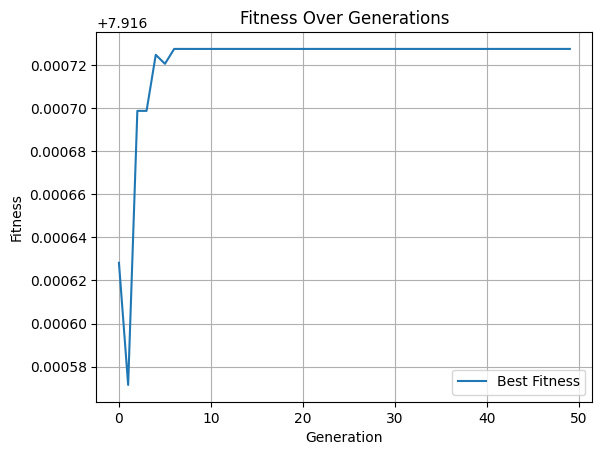

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Fitness Function ---
def fitness_function(x):
    return x * np.sin(x)

# --- Genetic Algorithm Parameters ---
population_size = 20
generations = 50
crossover_rate = 0.8
mutation_rate = 0.1
gene_bounds = (0, 10)  # valid range of x values

# --- Initialize Population (array of real numbers) ---
population = np.random.uniform(gene_bounds[0], gene_bounds[1], size=population_size)

# --- Track Best Fitness Over Generations ---
best_fitness_history = []

# --- Genetic Algorithm Main Loop ---
for generation in range(generations):
    # Step 1: Evaluate Fitness
    fitness = fitness_function(population)

    # Step 2: Selection (Select top 50%)
    sorted_indices = np.argsort(fitness)[::-1]
    top_half = population[sorted_indices[:population_size // 2]]

    # Step 3: Crossover
    children = []
    while len(children) < population_size:
        if np.random.rand() < crossover_rate:
            parent1, parent2 = np.random.choice(top_half, 2, replace=False)
            child = (parent1 + parent2) / 2
        else:
            child = np.random.choice(top_half)
        # Step 4: Mutation
        if np.random.rand() < mutation_rate:
            child += np.random.uniform(-1.0, 1.0)
        # Keep child within bounds
        child = np.clip(child, gene_bounds[0], gene_bounds[1])
        children.append(child)

    # Step 5: Replace old population with new one
    population = np.array(children)

    # Track best fitness in current generation
    best_fitness = np.max(fitness_function(population))
    best_fitness_history.append(best_fitness)

    print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.4f}")

# --- Final Result ---
best_solution = population[np.argmax(fitness_function(population))]
print(f"\n✅ Best Solution: x = {best_solution:.4f}, f(x) = {fitness_function(best_solution):.4f}")

# --- Plot Fitness Over Generations ---
plt.plot(best_fitness_history, label='Best Fitness')
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)
plt.show()


$PROGRAM-4$ : $PARALLEL ALGORITHMS$

In [ ]:
import concurrent.futures
def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result
def parallel_merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    with concurrent.futures.ProcessPoolExecutor(max_workers=8) as executor:
        left_future = executor.submit(parallel_merge_sort, arr[:mid])
        right_future = executor.submit(parallel_merge_sort, arr[mid:])
        left = left_future.result()
        right = right_future.result()
    return merge(left, right)
arr = [38, 27, 43, 3, 9, 82, 10]
sorted_arr = parallel_merge_sort(arr)
print(sorted_arr)


[3, 9, 10, 27, 38, 43, 82]


Ensemble model : A Stacking-based SMS spam detection model using TF-IDF vectorization and ensemble learning with Scikit-learn.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB,CategoricalNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', names=['label', 'message'])
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
pipeline = make_pipeline(
    TfidfVectorizer(),
    StackingClassifier(
        estimators=[('nb', MultinomialNB()), ('svc', SVC(probability=True)), ('rf', RandomForestClassifier(n_estimators=100, random_state=42))],
        final_estimator=LogisticRegression()
    )
)
pipeline.fit(X_train, y_train)
print(classification_report(y_test, pipeline.predict(X_test)))


$PROGRAM-5$ : $ANT COLONY OPTIMIZATION$

In [ ]:
import numpy as np

# Parameters
num_ants, num_iter, rho, Q = 2, 5, 100, 5  # Number of ants, iterations, evaporation rate, pheromone factor

dist = np.array([[0,10,17,10], [10,0,10,10], [17,10,0,10], [10,10,10,0]])  # Distance matrix
n = len(dist)  # Number of cities
pher = np.ones((n, n))  # Initialize pheromone matrix with ones

# Function to calculate the cost (total distance) of a given path
def cost(path):
    return sum(dist[path[i], path[i+1]] for i in range(n-1)) + dist[path[-1], path[0]]

# Function to update pheromone levels based on solutions
def update(pher, sols):
    for path in sols:
        for i in range(n):
            pher[path[i], path[(i+1) % n]] += Q / cost(path)  # Pheromone deposit
    pher *= (1 - rho)  # Evaporation of pheromone

# Ant Colony Optimization function
def aco():
    best_path, best_cost = None, float('inf')
    for _ in range(num_iter):
        sols = [np.random.permutation(n) for _ in range(num_ants)]  # Generate solutions
        update(pher, sols)  # Update pheromones
        for path in sols:
            c = cost(path)
            if c < best_cost:
                best_path, best_cost = path, c  # Update best solution
    return best_path, best_cost

# Run the ACO algorithm and print the best solution
print("Best solution:", *aco())


Best solution: [2 3 0 1] 40


$PROGRAM-6$ : $PARTICLE$ $SWARM$ $OPTIMIZATION$

In [ ]:
import numpy as np


class PSO:
    def __init__(self, dim, bounds, func, c1=0.8, c2=0.4, particles=20, iters=100):
        self.dim, self.bounds, self.func = dim, bounds, func
        self.c1, self.c2, self.particles, self.iters = c1, c2, particles, iters


    def optimize(self):
        loc = np.random.uniform(self.bounds[:, 0], self.bounds[:, 1], (self.particles, self.dim))
        vel = pbest = loc.copy()
        fit = self.func(loc)
        gbest = loc[np.argmin(fit)]
        best_cost = np.min(fit)  # Track the best cost


        for i in range(self.iters):
            r = np.random.rand(self.particles, 2)
            vel = 0.9 * vel + self.c1 * r[:, 0:1] * (pbest - loc) + self.c2 * r[:, 1:2] * (gbest - loc)
            loc = np.clip(loc + vel, self.bounds[:, 0], self.bounds[:, 1])
            fit_new = self.func(loc)
            pbest[fit_new < fit], fit = loc[fit_new < fit], np.minimum(fit, fit_new)
            gbest = loc[np.argmin(fit)] if np.min(fit) < self.func(gbest) else gbest
            best_cost = np.min(fit)


        return gbest, self.func(gbest), best_cost


# Function and bounds
def f(x): return x**2 + 5*x + 20  # x is already a 1D array
bounds = np.array([[-10, 10]])


# PSO optimization
pso = PSO(1, bounds, f, particles=9, iters=50)
best_solution, best_value, best_cost = pso.optimize()
print(f"Best Solution: {best_solution}, Function Value: {best_value}, Cost: {best_cost}")






Best Solution: [-2.48882592], Function Value: [13.75012486], Cost: 13.750124859954948


$PROGRAM-7$ : $GREY$ $WOLF$ $OPTIMIZATION$

In [ ]:
import numpy as np

# Objective Function (Sphere Function)
def objective_function(x):
    return np.sum(x**2)

# Grey Wolf Optimizer
def grey_wolf_optimization(obj_func, dim, n_wolves, max_iter, bounds):
    # Initialize wolves' positions
    wolves = np.random.uniform(bounds[0], bounds[1], (n_wolves, dim))
    alpha, beta, delta = np.zeros(dim), np.zeros(dim), np.zeros(dim)
    alpha_score, beta_score, delta_score = float("inf"), float("inf"), float("inf")

    print("Initial Wolves' Positions:")
    print(wolves)

    for t in range(max_iter):
        for i in range(n_wolves):
            fitness = obj_func(wolves[i])
            # Update alpha, beta, and delta
            if fitness < alpha_score:
                delta_score, delta = beta_score, beta.copy()
                beta_score, beta = alpha_score, alpha.copy()
                alpha_score, alpha = fitness, wolves[i].copy()
            elif fitness < beta_score:
                delta_score, delta = beta_score, beta.copy()
                beta_score, beta = fitness, wolves[i].copy()
            elif fitness < delta_score:
                delta_score, delta = fitness, wolves[i].copy()

        a = 2 - t * (2 / max_iter)  # Linearly decreasing from 2 to 0

        for i in range(n_wolves):
            for j in range(dim):
                r1, r2 = np.random.rand(), np.random.rand()
                A1, C1 = 2*a*r1 - a, 2*r2
                D_alpha = abs(C1*alpha[j] - wolves[i][j])
                X1 = alpha[j] - A1*D_alpha

                r1, r2 = np.random.rand(), np.random.rand()
                A2, C2 = 2*a*r1 - a, 2*r2
                D_beta = abs(C2*beta[j] - wolves[i][j])
                X2 = beta[j] - A2*D_beta

                r1, r2 = np.random.rand(), np.random.rand()
                A3, C3 = 2*a*r1 - a, 2*r2
                D_delta = abs(C3*delta[j] - wolves[i][j])
                X3 = delta[j] - A3*D_delta

                wolves[i][j] = (X1 + X2 + X3) / 3

        print(f"\nIteration {t+1}/{max_iter}: Best Fitness = {alpha_score:.5f}")

    print("\nOptimization Complete!")
    print("Best Position Found (Alpha Wolf):", alpha)
    print("Best Fitness Value:", alpha_score)

# Parameters
dim = 5
n_wolves = 10
max_iter = 20
bounds = (-10, 10)

# Run GWO
grey_wolf_optimization(objective_function, dim, n_wolves, max_iter, bounds)


Initial Wolves' Positions:
[[-1.52408166 -2.66335632 -2.44355962  0.39174462  1.45671439]
 [ 8.50323306 -7.82647646  0.76431228 -4.41882886  6.09960145]
 [-7.36046816 -2.76091781  4.81625284 -3.08980192 -2.85643019]
 [ 0.96946203  8.30906709 -0.58504537 -2.58786118  6.48659208]
 [-8.08522566  0.95524242 -7.90681386 -4.33888537  9.2444587 ]
 [ 5.66724182 -2.22377687  5.0618794  -4.93041458 -0.99549254]
 [ 9.8724586   3.91830613  8.17928197  1.55962632  3.47433699]
 [ 6.07267335  8.1145366  -0.33623231  5.50840804 -4.34164695]
 [-5.60159374 -5.81208384  5.87985123  2.81487661 -8.59240262]
 [-0.85301055 -0.94052983  8.45114688 -0.45802712 -4.42830549]]

Iteration 1/20: Best Fitness = 17.66276

Iteration 2/20: Best Fitness = 17.66276

Iteration 3/20: Best Fitness = 8.94415

Iteration 4/20: Best Fitness = 4.96752

Iteration 5/20: Best Fitness = 1.82768

Iteration 6/20: Best Fitness = 1.63190

Iteration 7/20: Best Fitness = 0.60937

Iteration 8/20: Best Fitness = 0.46795

Iteration 9/20: Bes

$PROGRAM-8$ : $CRISP$ $PARTITIONS$

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  True Class  Cluster  
0     setosa        1  
1     setosa        1  
2     setosa        1  
3     setosa        1  
4     setosa        1  

Cluster distribution:
True Class  Cluster
setosa      1          49
virginica   2          42
versicolor  0          37
            2          13
virginica   0           8
setosa      0           1
Name: count, dtype: int64


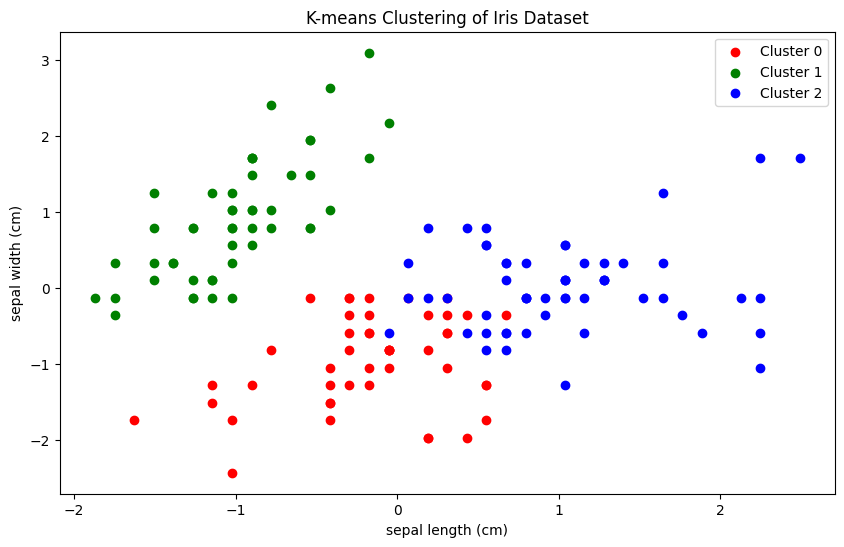

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
kmeans = KMeans(n_clusters=3).fit(X)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['True Class'] = [iris.target_names[i] for i in iris.target]
df['Cluster'] = kmeans.labels_
print(df.head())
print("\nCluster distribution:")
print(df[['True Class', 'Cluster']].value_counts())
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X[df['Cluster']==i, 0], X[df['Cluster']==i, 1],
                c=colors[i], label=f'Cluster {i}')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()

$PROGRAM-9$ : $PERCEPTRON$ $HEBBS$ $DELTA$

In [ ]:
import numpy as np

# Input patterns (2 features + bias)
X = np.array([[1, 1, 1],     # Class 1
              [1, -1, 1],    # Class 1
              [-1, 1, 1],    # Class 2
              [-1, -1, 1]])  # Class 2

# Desired outputs (for visualization only, not used in Hebb's rule)
Y = np.array([1, 1, -1, -1])

# Initialize weights
weights = np.zeros(3)

# Hebb's learning rule: w = w + x*y
for i in range(len(X)):
    weights += X[i] * Y[i]
    print(f"After sample {i+1}, updated weights: {weights}")

# Display final weights
print("\nFinal weights after Hebb's learning:", weights)


After sample 1, updated weights: [1. 1. 1.]
After sample 2, updated weights: [2. 0. 2.]
After sample 3, updated weights: [ 3. -1.  1.]
After sample 4, updated weights: [4. 0. 0.]

Final weights after Hebb's learning: [4. 0. 0.]


In [ ]:
#DELTA
import numpy as np

# Input patterns (2 features + bias)
X = np.array([[1, 1, 1],
              [1, -1, 1],
              [-1, 1, 1],
              [-1, -1, 1]])

# Desired outputs
Y = np.array([1, 1, -1, -1])

# Initialize weights
weights = np.zeros(3)
learning_rate = 0.1

# Training
for epoch in range(10):
    print(f"\nEpoch {epoch+1}")
    for i in range(len(X)):
        y_pred = np.sign(np.dot(X[i], weights))
        error = Y[i] - y_pred
        weights += learning_rate * error * X[i]
        print(f"Sample {i+1}: Pred={y_pred}, Error={error}, Weights={weights}")

# Display final weights
print("\nFinal weights after Perceptron Delta Rule:", weights)



Epoch 1
Sample 1: Pred=0.0, Error=1.0, Weights=[0.1 0.1 0.1]
Sample 2: Pred=1.0, Error=0.0, Weights=[0.1 0.1 0.1]
Sample 3: Pred=1.0, Error=-2.0, Weights=[ 0.3 -0.1 -0.1]
Sample 4: Pred=-1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]

Epoch 2
Sample 1: Pred=1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
Sample 2: Pred=1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
Sample 3: Pred=-1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
Sample 4: Pred=-1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]

Epoch 3
Sample 1: Pred=1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
Sample 2: Pred=1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
Sample 3: Pred=-1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
Sample 4: Pred=-1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]

Epoch 4
Sample 1: Pred=1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
Sample 2: Pred=1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
Sample 3: Pred=-1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
Sample 4: Pred=-1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]

Epoch 5
Sample 1: Pred=1.0, Error=0.0, Weights=[ 0.3 -0.1 -0.1]
S

$PROGRAM-10$ : $ENSEMBLE$ $NETWORK$ $PROGRAMMING$

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# 1. Generate a simple dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, random_state=1)

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define individual models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()

# 4. Create Ensemble using Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('knn', model3)
], voting='hard')  # Use 'soft' for probabilities

# 5. Train models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
ensemble.fit(X_train, y_train)

# 6. Predict using individual models and ensemble
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred_ens = ensemble.predict(X_test)

# 7. Display accuracy
print("Accuracy of Logistic Regression:", accuracy_score(y_test, pred1))
print("Accuracy of Decision Tree      :", accuracy_score(y_test, pred2))
print("Accuracy of KNN                :", accuracy_score(y_test, pred3))
print("Accuracy of Ensemble Model     :", accuracy_score(y_test, pred_ens))

# 8. Display sample predictions
print("\nSample Predictions (first 5 test points):")
print("LR  :", pred1[:5])
print("DT  :", pred2[:5])
print("KNN :", pred3[:5])
print("Ensemble:", pred_ens[:5])


Accuracy of Logistic Regression: 1.0
Accuracy of Decision Tree      : 0.9333333333333333
Accuracy of KNN                : 0.9666666666666667
Accuracy of Ensemble Model     : 1.0

Sample Predictions (first 5 test points):
LR  : [1 0 0 1 1]
DT  : [1 0 0 1 1]
KNN : [1 0 0 1 1]
Ensemble: [1 0 0 1 1]
